<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum10_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan 1**

**Import Library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Bagian 1: Memuat dan Menyiapkan Data**

In [3]:
# Data Set (raining) dari gambar
data = {
    'Temperatur Udara (°C)': [10, 25, 15, 20, 18, 20, 22, 24],
    'Kecepatan Angin (Km/jam)': [0, 0, 5, 3, 7, 10, 5, 6],
    'Klasifikasi atau Persepsi Marry': ['Dingin', 'Panas', 'Dingin', 'Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}

df = pd.DataFrame(data)

print("Data Awal:")
print(df)
print("\n")

Data Awal:
   Temperatur Udara (°C)  Kecepatan Angin (Km/jam)  \
0                     10                         0   
1                     25                         0   
2                     15                         5   
3                     20                         3   
4                     18                         7   
5                     20                        10   
6                     22                         5   
7                     24                         6   

  Klasifikasi atau Persepsi Marry  
0                          Dingin  
1                           Panas  
2                          Dingin  
3                           Panas  
4                          Dingin  
5                          Dingin  
6                           Panas  
7                           Panas  




In [4]:
# Pisahkan Fitur (X) dan Target (y)
X = df[['Temperatur Udara (°C)', 'Kecepatan Angin (Km/jam)']]
y = df['Klasifikasi atau Persepsi Marry']

In [5]:
# Scaling Fitur (Penting untuk KNN agar jarak dihitung secara adil)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Fitur Setelah Scaling (X_scaled_df):")
print(X_scaled_df)
print("\n")

Fitur Setelah Scaling (X_scaled_df):
   Temperatur Udara (°C)  Kecepatan Angin (Km/jam)
0              -2.009564                 -1.405564
1               1.249189                 -1.405564
2              -0.923313                  0.156174
3               0.162938                 -0.468521
4              -0.271563                  0.780869
5               0.162938                  1.717911
6               0.597438                  0.156174
7               1.031938                  0.468521




**Bagian 2: Menentukan Nilai K Terbaik**

In [6]:
# Bagi data menjadi Training dan Test set untuk evaluasi K
# Meskipun data kecil, pembagian ini diperlukan untuk menguji akurasi model
# Kita gunakan 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [7]:
# Coba berbagai nilai K
neighbors = np.arange(1, len(X_train)) # Coba K dari 1 sampai N-1 data training
accuracies = []

for k in neighbors:
    # Inisialisasi dan latih model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Prediksi di Test set
    y_pred = knn.predict(X_test)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [8]:
# Temukan K terbaik
best_k_index = np.argmax(accuracies)
best_k = neighbors[best_k_index]
best_accuracy = accuracies[best_k_index]

print(f"Hasil Akurasi vs. Nilai K:")
for k, acc in zip(neighbors, accuracies):
    print(f"K = {k}: Akurasi = {acc:.4f}")

print(f"\nNilai K Terbaik: {best_k}")
print(f"Akurasi Terbaik (pada Test Set): {best_accuracy:.4f}")

Hasil Akurasi vs. Nilai K:
K = 1: Akurasi = 1.0000
K = 2: Akurasi = 1.0000
K = 3: Akurasi = 1.0000
K = 4: Akurasi = 0.6667

Nilai K Terbaik: 1
Akurasi Terbaik (pada Test Set): 1.0000


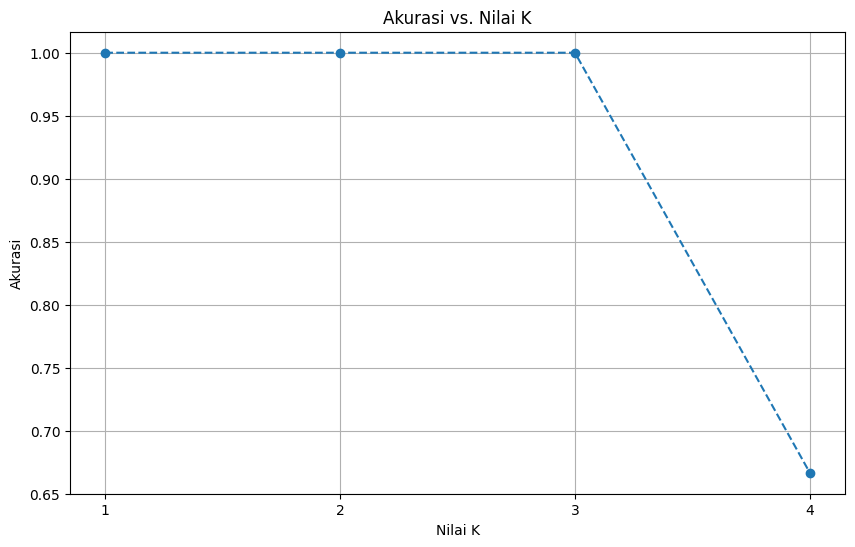

In [9]:
# Visualisasi (opsional)
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='--')
plt.title('Akurasi vs. Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

print("\n")

**Bagian 3: Prediksi untuk Data Uji**

In [10]:
# Data Uji
data_uji = np.array([[16, 3]]) # Temperatur 16°C, Kecepatan Angin 3 km/jam

In [11]:
# Lakukan Scaling pada Data Uji menggunakan scaler yang SAMA dengan data training
data_uji_scaled = scaler.transform(data_uji)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Gunakan model KNN dengan K terbaik yang ditemukan
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [13]:
# Latih model final menggunakan SELURUH data set asli (lebih umum untuk prediksi)
# Jika K terbaik adalah 1, model ini akan sempurna pada data training
final_knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=np.int64(1))

In [14]:
# Lakukan Prediksi
persepsi_marry = final_knn_model.predict(data_uji_scaled)

print(f"Data Uji: Temperatur = 16°C, Kecepatan Angin = 3 km/jam")
print(f"Model KNN (K={best_k}) memprediksi: **{persepsi_marry[0]}**")

Data Uji: Temperatur = 16°C, Kecepatan Angin = 3 km/jam
Model KNN (K=1) memprediksi: **Dingin**


# **Latihan 2**

**Import Library**

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

**Input Data dan Konversi**

In [27]:
data = {
    'Nim': ['TI001', 'TI002', 'TI003', 'TI004', 'TI005', 'TI006', 'TI007', 'TI008', 'TI009', 'TI010'],
    'Hasil Sebenarnya': ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'],
    'Hasil Prediksi': ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
}

df2 = pd.DataFrame(data)

print("--- Data Awal ---")
print(df2)
print("-" * 30)

--- Data Awal ---
     Nim Hasil Sebenarnya Hasil Prediksi
0  TI001            Lulus          Lulus
1  TI002            Lulus          Lulus
2  TI003            Lulus          Lulus
3  TI004            Lulus    Tidak Lulus
4  TI005            Lulus    Tidak Lulus
5  TI006      Tidak Lulus          Lulus
6  TI007      Tidak Lulus    Tidak Lulus
7  TI008      Tidak Lulus    Tidak Lulus
8  TI009      Tidak Lulus    Tidak Lulus
9  TI010      Tidak Lulus    Tidak Lulus
------------------------------


In [28]:
# Label yang akan digunakan dalam perhitungan
# Kita definisikan 'Lulus' sebagai kelas Positif
y_true = df2['Hasil Sebenarnya']
y_pred = df2['Hasil Prediksi']
labels = ['Lulus', 'Tidak Lulus']
pos_label = 'Lulus'

**Confusion Matrix**

In [29]:
# Hitung Confusion Matrix menggunakan sklearn
# confusion_matrix(y_true, y_pred, labels=[Positive_Label, Negative_Label])
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Buat DataFrame untuk tampilan yang lebih mudah dibaca
# Baris: Actual (Sebenarnya); Kolom: Predicted (Prediksi)
confusion_df2 = pd.DataFrame(cm,
                            index=[f'Aktual: {l}' for l in labels],
                            columns=[f'Prediksi: {l}' for l in labels])

print(confusion_df2)
print("-" * 30)

                     Prediksi: Lulus  Prediksi: Tidak Lulus
Aktual: Lulus                      3                      2
Aktual: Tidak Lulus                1                      4
------------------------------


In [30]:
# Ekstraksi nilai TP, TN, FP, FN dari matrix
# Misal: [row_actual, col_predicted]
# Row 0 (Lulus): Positif Class
# Row 1 (Tidak Lulus): Negatif Class

# True Positive (TP): Aktual Lulus, Prediksi Lulus (Baris 0, Kolom 0)
TP = cm[0, 0]
# False Negative (FN): Aktual Lulus, Prediksi Tidak Lulus (Baris 0, Kolom 1)
FN = cm[0, 1]
# False Positive (FP): Aktual Tidak Lulus, Prediksi Lulus (Baris 1, Kolom 0)
FP = cm[1, 0]
# True Negative (TN): Aktual Tidak Lulus, Prediksi Tidak Lulus (Baris 1, Kolom 1)
TN = cm[1, 1]

print(f"Nilai Komponen:")
print(f"True Positive (TP): {TP} (Lulus diprediksi Lulus)")
print(f"False Negative (FN): {FN} (Lulus diprediksi Tidak Lulus)")
print(f"False Positive (FP): {FP} (Tidak Lulus diprediksi Lulus)")
print(f"True Negative (TN): {TN} (Tidak Lulus diprediksi Tidak Lulus)")
print("-" * 30)

Nilai Komponen:
True Positive (TP): 3 (Lulus diprediksi Lulus)
False Negative (FN): 2 (Lulus diprediksi Tidak Lulus)
False Positive (FP): 1 (Tidak Lulus diprediksi Lulus)
True Negative (TN): 4 (Tidak Lulus diprediksi Tidak Lulus)
------------------------------


**Perhitungan Metrik Evaluasi**

In [31]:
# a. ACCURACY: (TP + TN) / Total
total_data = len(y_true)
accuracy = (TP + TN) / total_data
accuracy_percent = accuracy * 100

In [32]:
# b. PRECISION: TP / (TP + FP)
# Menghitung precision untuk kelas 'Lulus' (kelas positif)
# Jika (TP + FP) = 0, kita set precision = 0 untuk menghindari ZeroDivisionError
try:
    precision = TP / (TP + FP)
except ZeroDivisionError:
    precision = 0
precision_percent = precision * 100

In [33]:
# c. RECALL: TP / (TP + FN)
# Menghitung recall untuk kelas 'Lulus' (kelas positif)
# Jika (TP + FN) = 0, kita set recall = 0 untuk menghindari ZeroDivisionError
try:
    recall = TP / (TP + FN)
except ZeroDivisionError:
    recall = 0
recall_percent = recall * 100

print(f"Akurasi (Accuracy): ({TP} + {TN}) / {total_data} = {accuracy:.4f} ({accuracy_percent:.2f}%)")
print(f"Precision: {TP} / ({TP} + {FP}) = {precision:.4f} ({precision_percent:.2f}%)")
print(f"Recall: {TP} / ({TP} + {FN}) = {recall:.4f} ({recall_percent:.2f}%)")
print("-" * 30)

Akurasi (Accuracy): (3 + 4) / 10 = 0.7000 (70.00%)
Precision: 3 / (3 + 1) = 0.7500 (75.00%)
Recall: 3 / (3 + 2) = 0.6000 (60.00%)
------------------------------


# **Latihan 3**

**Import Library**

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Input data dan Menampilkan lima baris pertama**

In [36]:
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1jMp4U3-RTd06YMBi28JGDBRwAbTLZcyP")
df3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


**Preprocessing: Encoding Fitur Kategorikal**

In [37]:
categorical_cols = ["Cloud Cover", "Season", "Location", "Weather Type"]

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    le_dict[col] = le

**Pemisahan Fitur dan Target**

In [38]:
X = df3.drop("Weather Type", axis=1)
y = df3["Weather Type"]

**Scaling (Normalisasi/Standardisasi)**

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Pembagian Data Latih dan Data Uji**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

**Pelatihan Model K-Nearest Neighbors (KNN)**

In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediksi dan Evaluasi (Confusion Matrix)**

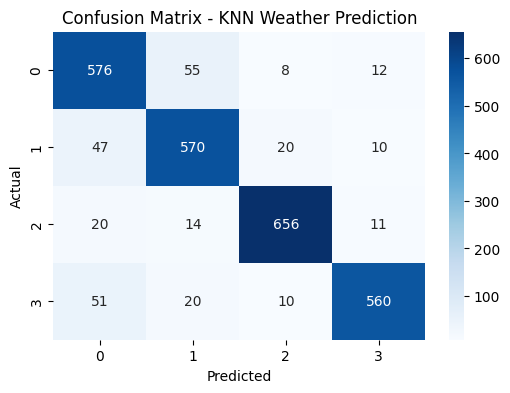

In [42]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Weather Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Evaluasi (Classification Report)**

In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       651
           1       0.86      0.88      0.87       647
           2       0.95      0.94      0.94       701
           3       0.94      0.87      0.91       641

    accuracy                           0.89      2640
   macro avg       0.90      0.89      0.89      2640
weighted avg       0.90      0.89      0.90      2640

